### Description
For this exam, you will predict the target values for the test.csv. 
### Attributes
- A: Number of pregnancies
- B: Concentration of plasma glucose in a 2-hour oral glucose tolerance test
- C: Diastolic blood pressure - Measured in mmHg
- D: Triceps skin fold thickness - Measured in mm
- E: Insulin concentration in the serum in 2 hours. Measured in (mu U/ml)
- F: Weight in kg/height in (m^2)
- G: Function that assigns the probability of someone getting diabetes
- H: Age
- Target: Value of 0 or 1 corresponds to no diabetes and diabetes

### Devliverable
Submit the iPython notebook or the .py file of your work. Also, you should submit the csv file of the prediction. 

### Exam rules
You can use only the machine learning models discussed in Course Module 3. If the prediction is based on a model that is not discussed in class, one of the models in your submission will randomly be selected for grading. Fifty percent of the grade is based on your Python code submission. The following rubric will be used for grading. The other 50 percent of your grade is based on the accuracy of the prediction. 

### Rubric
| Descriptio | Fair | Good | excelent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|Machine learning model | Demonstrate limited understanding of methods used to train machine learning models | Demonstrate the ability to understand techniques used to train machine learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance. 

Note : Kindly run the all the steps until Data Preprocessing and Train Test Split before running each model

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

In [2]:
#reading the values from the test and train dataset
data1 = pd.read_csv("train.csv")
data2 = pd.read_csv("test.csv")

In [3]:
#checking the head of train dataset
data1.head()

,A,B,C,D,E,F,G,H,Target
0,5,122,86,NaN,NaN,34.7,0.290,33,0
1,2,175,88,NaN,NaN,22.9,0.326,22,0
2,4,129,86,2.0,27.0,35.1,0.231,23,0
3,12,92,62,7.0,258.0,27.6,0.926,44,1
4,3,102,44,2.0,94.0,3.8,0.400,26,0


In [4]:
#checking the head of test dataset
data2.head()

,A,B,C,D,E,F,G,H
0,6,148,72,35.0,NaN,33.6,0.627,50
1,1,85,66,29.0,NaN,26.6,0.351,31
2,5,116,74,NaN,NaN,25.6,0.201,30
3,4,110,92,NaN,NaN,37.6,0.191,30
4,5,166,72,19.0,175.0,25.8,0.587,51


# Exploratory Data Analysis and Imputation

In this section we will be checking the dataset for missing values, outliers, shape of the dataset, type of distribution and we will be imputing the missing values to go ahead with further Machine Learning explorations

In [5]:
#checking the shape of train dataset
data1.shape

(500, 9)

In [6]:
#checking the shape of test dataset - target value is to be predicted hence 8 columns
data2.shape

(268, 8)

In [7]:
#checking the column Target split for 0 & 1
data1.groupby('Target').size()

Target
0    338
1    162
dtype: int64

In [8]:
#checking how many null values are present in data1 - train dataset
data1.isnull().sum()

A           0
B           0
C           0
D         140
E         247
F           8
G           0
H           0
Target      0
dtype: int64

In [9]:
#checking how many null values are present in data2 - test dataset
data1.isnull().sum()

A           0
B           0
C           0
D         140
E         247
F           8
G           0
H           0
Target      0
dtype: int64

In [10]:
#checking the info of columns - data1
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
A         500 non-null int64
B         500 non-null int64
C         500 non-null int64
D         360 non-null float64
E         253 non-null float64
F         492 non-null float64
G         500 non-null float64
H         500 non-null int64
Target    500 non-null int64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [11]:
#checking the info of columns - data2  
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 8 columns):
A    268 non-null int64
B    268 non-null int64
C    268 non-null int64
D    181 non-null float64
E    141 non-null float64
F    265 non-null float64
G    268 non-null float64
H    268 non-null int64
dtypes: float64(4), int64(4)
memory usage: 16.9 KB


In [12]:
#checking how many null values are present in data1 - train dataset
data1.isnull().sum()

A           0
B           0
C           0
D         140
E         247
F           8
G           0
H           0
Target      0
dtype: int64

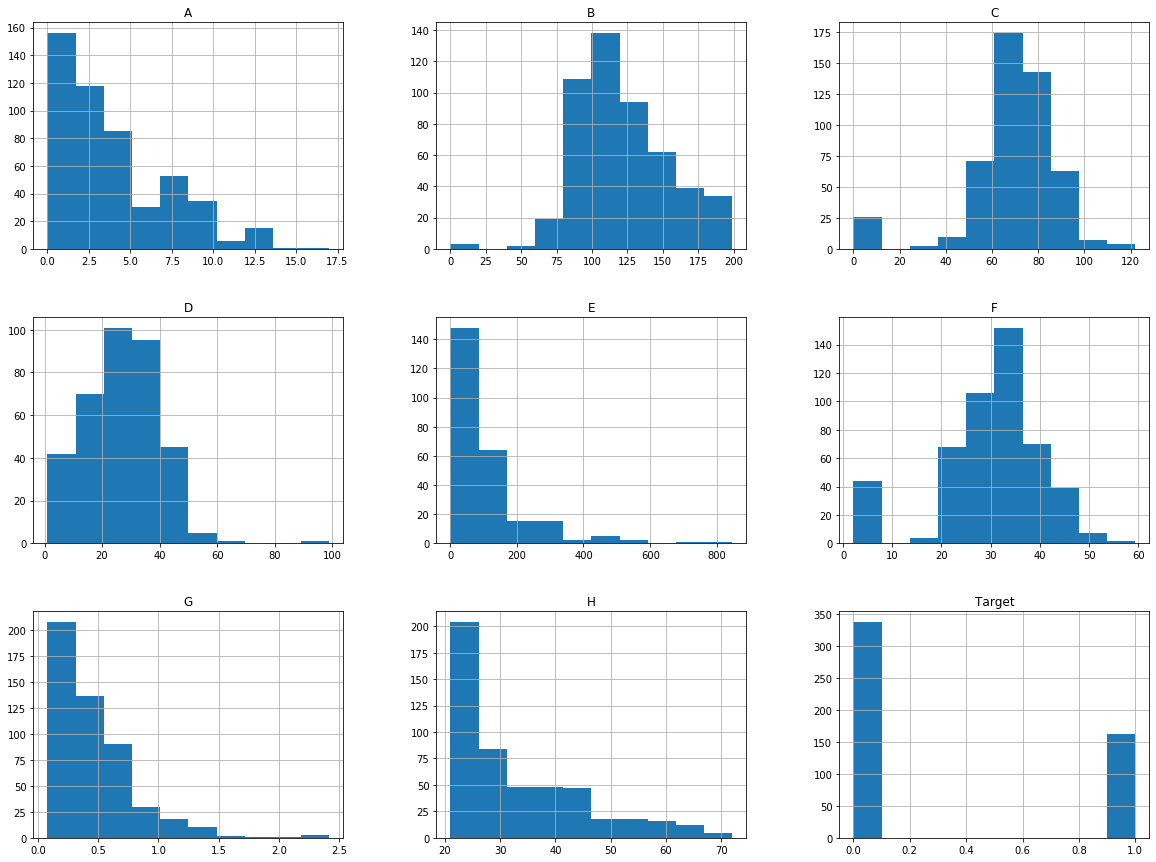

In [13]:
#checking tthe histogram of the train dataset fro each seperate columns to find their distribution
data1.hist(bins=10, figsize=(20, 15))
plt.show()

In [14]:
#imputing column D with mean - as this is right skewed as seen in the image above
data1['D'] = data1['D'].fillna((data1['D'].mean()))

In [15]:
#imputing column E with mean - as this is right skewed as seen in the image above
data1['E'] = data1['E'].fillna((data1['E'].mean()))

In [16]:
#imputing column E with mean - normal distribution but we are imputing the missing values to hide any variations in the model
data1['F'] = data1['F'].fillna((data1['F'].mean()))

In [17]:
#checking the null values again - shows us that the null values have been imputed
data1.isnull().sum()

A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
Target    0
dtype: int64

In [18]:
#checking how many null values are present in data2 - test dataset
data2.isnull().sum()

A      0
B      0
C      0
D     87
E    127
F      3
G      0
H      0
dtype: int64

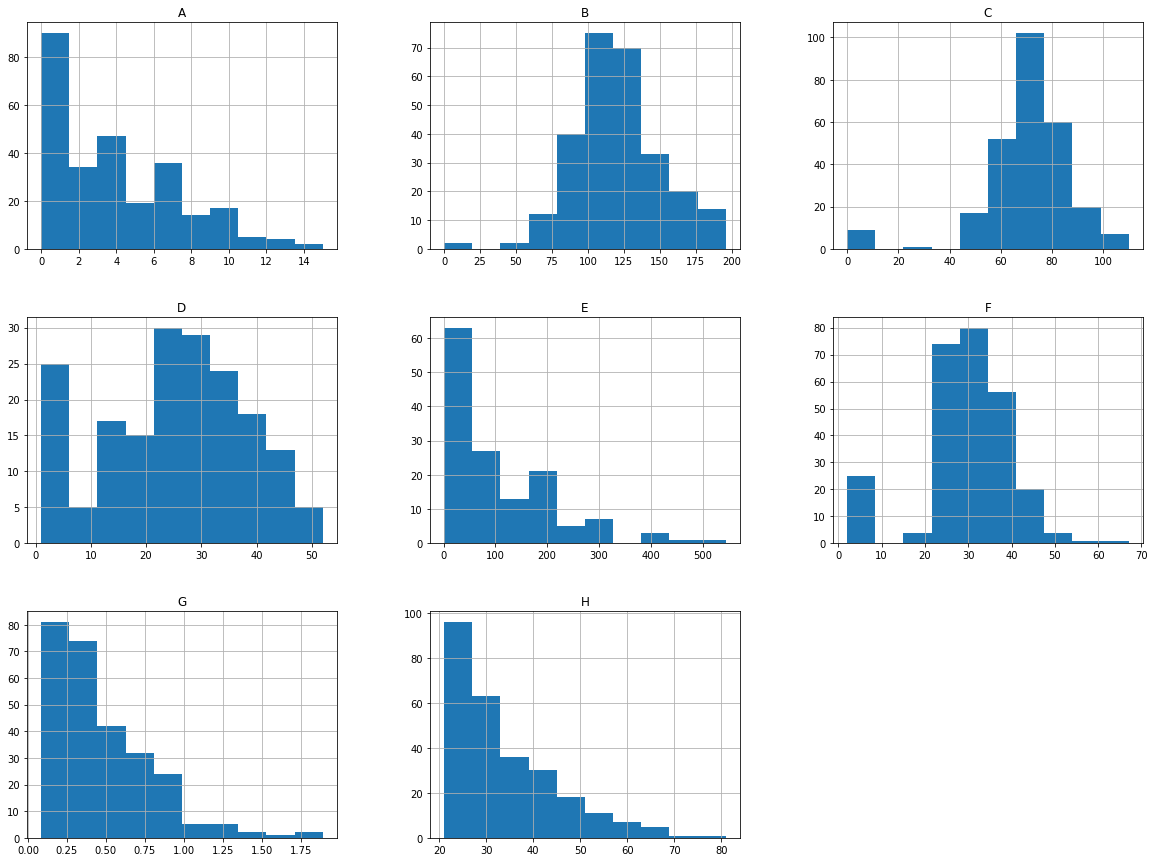

In [19]:
#checking tthe histogram of the test dataset for each seperate columns to find their distribution
data2.hist(bins=10, figsize=(20, 15))
plt.show()

In [20]:
#imputing column D with mean 
data2['D'] = data2['D'].fillna((data2['D'].mean()))
#imputing column E with mean 
data2['E'] = data2['E'].fillna((data2['E'].mean()))
#imputing column D with mean 
data2['F'] = data2['F'].fillna((data2['F'].mean()))

In [21]:
#checking how many null values are present in data2 - test dataset - after imputation
data2.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
dtype: int64

In [22]:
data2.head()

,A,B,C,D,E,F,G,H
0,6,148,72,35.000000,104.453901,33.6,0.627,50
1,1,85,66,29.000000,104.453901,26.6,0.351,31
2,5,116,74,25.016575,104.453901,25.6,0.201,30
3,4,110,92,25.016575,104.453901,37.6,0.191,30
4,5,166,72,19.000000,175.000000,25.8,0.587,51


In [23]:
#future purpose to read the predicted values into the dataset
test_predicted = data2.copy() 

In [24]:
test_predicted

,A,B,C,D,E,F,G,H
0,6,148,72,35.000000,104.453901,33.6,0.627,50
1,1,85,66,29.000000,104.453901,26.6,0.351,31
2,5,116,74,25.016575,104.453901,25.6,0.201,30
3,4,110,92,25.016575,104.453901,37.6,0.191,30
4,5,166,72,19.000000,175.000000,25.8,0.587,51
...,...,...,...,...,...,...,...,...
263,1,128,88,39.000000,11.000000,36.5,1.057,37
264,0,123,72,25.016575,104.453901,36.3,0.258,52
265,2,122,70,27.000000,104.453901,36.8,0.340,27
266,5,121,72,23.000000,112.000000,26.2,0.245,30


Now we can see that we have imputed all the null values with mean and also have done sufficient data exploration for this dataset. Hence now are moving onto further introduction to algorithms where we will be running different algorithms on the dataset and the predicting the test "target" values. Upon this we will checking which model is better in terms of accuracy and prediction and then we will be moving the test predicted values to the "test(data2)" dataset for submission.

# Data Preprocessing and Train Test Split

In this section we are splitting the data1(train) into y and X and also performing train-test split to make it more easy to run algorithms and predict.

In [25]:
#all columns except the final one belongs to X and the target belong to y
y = data1['Target'].values
X = data1.drop(['Target'], axis = 1).values

In [26]:
#we are using the default split with random_state = 0 and also we use Standard Scaler with
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
test_scaling = scaler.transform(data2)

In [27]:
#checking the X_train values
X_train

array([[-1.14336471, -0.55468903, -0.27760668, ..., -0.21164012,
        -0.01500477, -0.86885028],
       [-0.27601117,  0.11542145,  0.97538235, ...,  0.90572711,
         0.76346641, -0.53381804],
       [-0.27601117,  1.63839984,  0.8709666 , ...,  0.3227529 ,
         2.16471453,  1.56013347],
       ...,
       [ 2.61516728,  0.20680016, -3.61891077, ...,  0.96402453,
         0.34309197,  0.89006899],
       [ 0.30222452,  1.09012762,  0.03564058, ..., -0.01731539,
        -0.7841343 ,  2.48147214],
       [-1.14336471, -1.16388039, -0.27760668, ...,  0.56565882,
         0.26835874, -1.0363664 ]])

# K- Nearest Neighbors

In [28]:
#Here we are running K Nearest Neigbors for K values(1-10) through a for loop 

from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,10):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

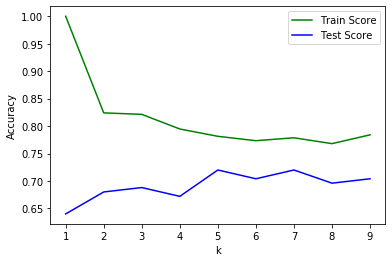

In [29]:
#plotting the explorations in a graph to find exact rise for test

x_axis = range(1,10)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [30]:
#predicting the train score and test score
knn_7 = KNeighborsClassifier(7)
knn_7.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn_7.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn_7.score(X_test, y_test)))

Train score: 0.7787
Test score: 0.7200


In [31]:
#predicting the train score and test score
knn_5 = KNeighborsClassifier(5)
knn_5.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn_5.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn_5.score(X_test, y_test)))

Train score: 0.7813
Test score: 0.7200


Here K=5 seems better than K=7 in terms of accuracy and we can also see the same from graph plotted above. Hence I am choosing K=5 for prediction

In [32]:
#predicting the target values for test dataset - knn
count_knn = knn_5.predict(test_scaling)
print(count_knn)

[1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 1 1 0 1 1 0 0 0]


In [33]:
#checking the amount of 0's and 1's in the test dataset prediction - knn
knn_coll = np.array(count_knn)
collections.Counter(knn_coll)

Counter({1: 63, 0: 205})

# Logistic Regression

In [34]:
#Logistic Regression - solving with library liblinear that was found out as default through research

from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'liblinear')
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

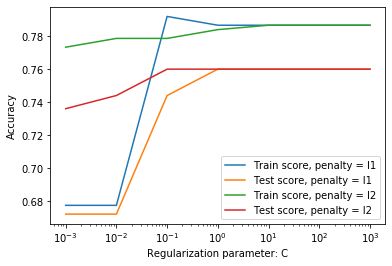

In [35]:
#plotting the C values vs accuracy graph
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [36]:
#checking accuracy for different values of for C= 0.01
log1 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(log1.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(log1.score(X_test, y_test)))

Training set accuracy: 0.771
Test set accuracy: 0.712


In [37]:
#checking accuracy for different values of for C= 1
log2 = LogisticRegression(C=1).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(log2.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(log2.score(X_test, y_test)))

Training set accuracy: 0.787
Test set accuracy: 0.760


In [38]:
#checking accuracy for different values of for C= 0.1
log3 = LogisticRegression(C=0.1).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(log3.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(log3.score(X_test, y_test)))

Training set accuracy: 0.776
Test set accuracy: 0.768


Here we can see that for C = 0.1 the test set accuracy seems little bit on the higher side. Hence we are settling with C = 0.1 that was cofirmed as the best value of C using GridSearchCV that is not mentioned here 

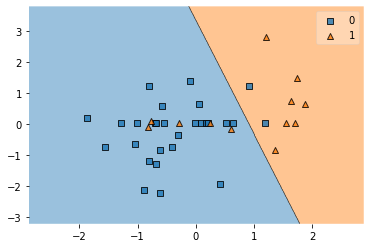

In [39]:
#plotting the decision and boundary regions
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

X_b = X_train[10:50, [1,3]]
y_b = y_train[10:50]

lreg = LogisticRegression()
lreg.fit(X_b, y_b)

plot_decision_regions(X_b, y_b, clf = lreg)

In [40]:
#predicting the target values for test dataset - logistic
count_log = log3.predict(test_scaling)
print(count_log)

[1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0]


In [41]:
#checking the amount of 0's and 1's in the test dataset prediction - logistic
log_coll = np.array(count_log)
collections.Counter(log_coll)

Counter({1: 49, 0: 219})

# Decision Tree

In [42]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.672


Here we are further introducing the concepts of depths to do further more analysis and to find out which is the suitable depth thats both cost effective and also gives out better prediction accuracy

In [43]:
#decision tree for tree_depth =3
tree3 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree3.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree3.score(X_test, y_test)))

Accuracy on training set: 0.821
Accuracy on test set: 0.720


In [44]:
#decision tree for tree_depth =4
tree4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree4.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree4.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree4.score(X_test, y_test)))

Accuracy on training set: 0.832
Accuracy on test set: 0.720


In [45]:
#decision tree for tree_depth =5
tree5 = DecisionTreeClassifier(max_depth=5, random_state=0)
tree5.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree5.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree5.score(X_test, y_test)))

Accuracy on training set: 0.837
Accuracy on test set: 0.728


In [46]:
#printing out the features importance
print("Feature importances:\n{}".format(tree5.feature_importances_))

Feature importances:
[0.04141956 0.61953679 0.00917077 0.05514414 0.         0.13892257
 0.1011753  0.03463088]


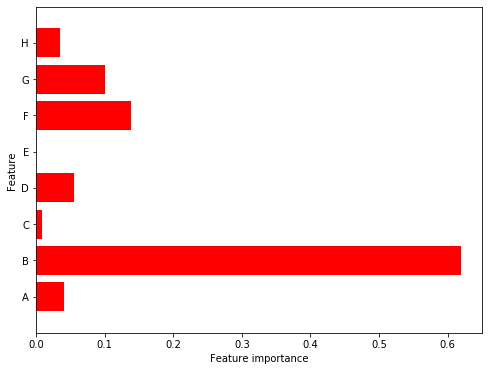

In [47]:
#printing out the feature importance graph
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center',color = "red")
    plt.yticks(np.arange(n_features), data1)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree5)
plt.savefig('feature_importance')

Feature B seems of more importance (Concentration of plasma glucose in a 2-hour oral glucose tolerance test)

In [48]:
#for treep depth 5 the test accuracy seems to improve, hence we are using that for further prediction
count_dt = tree5.predict(test_scaling)
print(count_dt)

[1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0
 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [49]:
#checking the amount of 0's and 1's in the test dataset prediction - decision tree
log_dt = np.array(count_dt)
collections.Counter(log_dt)

Counter({1: 55, 0: 213})

# SVC

In [50]:
#SVC
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.85
Accuracy on test set: 0.78


Eventhough we can find optimal kernel , gamma value and C value through GridSearchCV we are iterating each and every process again and again to fid the best optimal values are we are dealing upto Module-3

In [51]:
svc = SVC(C=0.01,gamma=0.01,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.792
Accuracy on test set: 0.760


In [52]:
svc = SVC(C=0.1,gamma=0.01,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.803
Accuracy on test set: 0.760


In [53]:
svc = SVC(C=1,gamma=0.01,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.803
Accuracy on test set: 0.752


In [54]:
svc = SVC(C=10,gamma=0.01,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.805
Accuracy on test set: 0.752


In [55]:
svc = SVC(C=0.01,gamma=0.1,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.792
Accuracy on test set: 0.760


In [56]:
svc = SVC(C=0.1,gamma=0.1,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.803
Accuracy on test set: 0.760


In [57]:
svc = SVC(C=1,gamma=0.1,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.803
Accuracy on test set: 0.752


In [58]:
svc = SVC(C=10,gamma=0.1,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.805
Accuracy on test set: 0.752


In [59]:
svc = SVC(C=0.01,gamma=1,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.792
Accuracy on test set: 0.760


In [60]:
svc = SVC(C=0.1,gamma=1,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.803
Accuracy on test set: 0.760


In [61]:
svc = SVC(C=1,gamma=1,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.803
Accuracy on test set: 0.752


In [62]:
svc = SVC(C=10,gamma=1,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.805
Accuracy on test set: 0.752


In [63]:
svc = SVC(C=0.01,gamma=10,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.792
Accuracy on test set: 0.760


In [64]:
svc = SVC(C=0.1,gamma=10,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.803
Accuracy on test set: 0.760


In [65]:
svc = SVC(C=1,gamma=10,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.803
Accuracy on test set: 0.752


In [66]:
svc = SVC(C=10,gamma=10,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.805
Accuracy on test set: 0.752


Here we are choosing the following as best parameters-Best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}, because it gives a better cross validation score as per the GridSearchCV which is done below. GridSearchCV is used as reference here

In [67]:
from sklearn import svm
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV

s = svm.SVC(random_state=0)
C = [0.01, 0.1, 1, 10]
param_svm = [{'kernel': ['rbf'],'C': C,'gamma': [0.01, 0.1, 1,10]},
 {'kernel': ['linear'],'C': C,'gamma': [0.01, 0.1, 1,10]},
 {'kernel': ['poly'],'C': C,'gamma': [0.01, 0.1, 1,10]}]
grid_svm = GridSearchCV(s, param_svm, cv=5, return_train_score=True)
grid_svm.fit(X_train, y_train)
print('train score: ', grid_svm.score(X_train, y_train))
print('test score: ', grid_svm.score(X_train, y_train))
print("Best parameters: {}".format(grid_svm.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svm.best_score_))

train score:  0.8026666666666666
test score:  0.8026666666666666
Best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best cross-validation score: 0.78


In [68]:
count_svm = svc.predict(test_scaling)
print(count_svm)
svm_coll = np.array(count_svm)
collections.Counter(svm_coll)

[1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0]


Counter({1: 56, 0: 212})

Here we are choosing a final model and pushing it into the test csv file. I choose KNN as best model because of its better ability to predict 1's when compared with other algorithms.

In [69]:
test_predicted['Target'] = count_knn

In [70]:
test_predicted

,A,B,C,D,E,F,G,H,Target
0,6,148,72,35.000000,104.453901,33.6,0.627,50,1
1,1,85,66,29.000000,104.453901,26.6,0.351,31,0
2,5,116,74,25.016575,104.453901,25.6,0.201,30,0
3,4,110,92,25.016575,104.453901,37.6,0.191,30,0
4,5,166,72,19.000000,175.000000,25.8,0.587,51,0
...,...,...,...,...,...,...,...,...,...
263,1,128,88,39.000000,11.000000,36.5,1.057,37,1
264,0,123,72,25.016575,104.453901,36.3,0.258,52,1
265,2,122,70,27.000000,104.453901,36.8,0.340,27,0
266,5,121,72,23.000000,112.000000,26.2,0.245,30,0


In [71]:
#test_predicted.to_csv('test_final_predicted.csv')

# Grading

In [72]:
from sklearn.metrics import accuracy_score
import numpy as np
y_test_actual = np.array([[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1]]).reshape(-1,)

accuracy_score(y_test_actual, count_knn)

0.7126865671641791